# Capstone Project

## Import Modules

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import sklearn.tree as tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression


In [3]:
!conda install -c anaconda seaborn -y
import seaborn as sns

Solving environment: done

# All requested packages already installed.



## Load data

In [4]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-05-30 11:51:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-05-30 11:51:57 (376 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

In [7]:
# Convert dates to date time objects
for heading in ['due_date','effective_date']:
    df[heading]=pd.to_datetime(df[heading])

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data visualsisation and pre-processing

In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

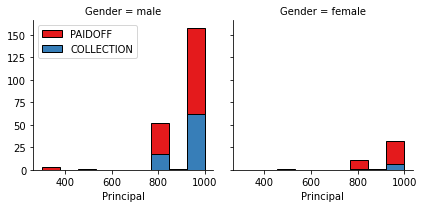

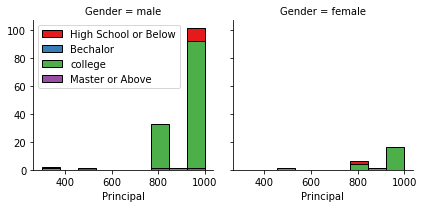

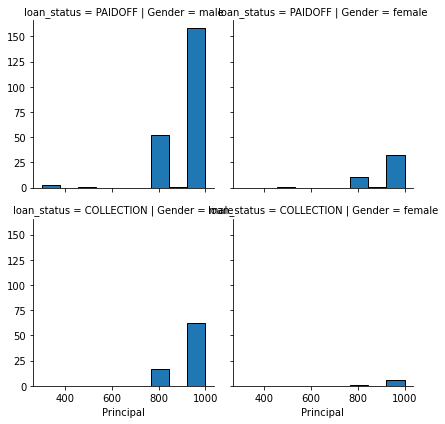

In [9]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="education", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[0].legend()
plt.show()


bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", row="loan_status", palette="Set1")
g.map_dataframe(plt.hist, 'Principal', bins=bins, ec="k")

plt.show()

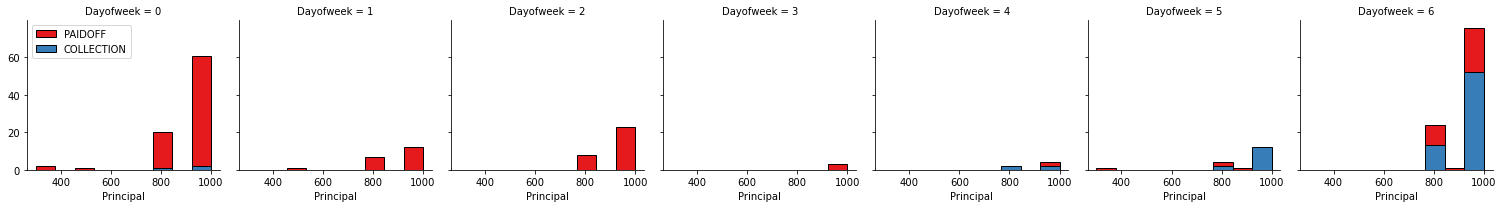

In [10]:
df['Dayofweek']=df['effective_date'].dt.dayofweek

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Dayofweek", hue="loan_status", palette="Set1", col_wrap=7)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[0].legend()
plt.show()



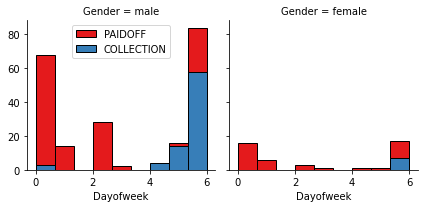

In [11]:
bins = np.linspace(df.Dayofweek.min(), df.Dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Dayofweek', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

### Add a catagorical element for weekend as most defaults seem to be at end of week

In [12]:
df['weekend'] = df['Dayofweek'].apply(lambda x: 1 if x>3 else 0)

In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


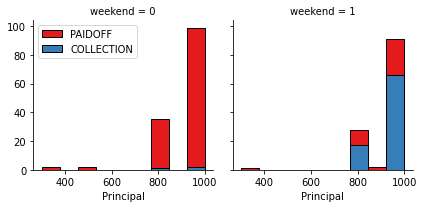

In [14]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="weekend", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[0].legend()
plt.show()

### Convert catagorical features to numerical

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
 10  Dayofweek       346 non-null    int64         
 11  weekend         346 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 32.6+ KB


In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [18]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

## One Hot Encoding

In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature.head()

,Principal,terms,age,Gender,weekend
0,1000,30,45,0,0
1,1000,30,33,1,0
2,1000,15,27,0,0
3,1000,30,28,1,1
4,1000,30,29,0,1


In [21]:
Feature = pd.concat([Feature, pd.get_dummies(df['education'])],axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In [22]:
Feature['Master or Above'].value_counts()

0    344
1      2
Name: Master or Above, dtype: int64

In [23]:
Feature.drop(['Master or Above'], axis = 1, inplace = True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Define feature sets

In [24]:
X = Feature
X[0:4]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1


In [25]:
len(np.asarray(X))

346

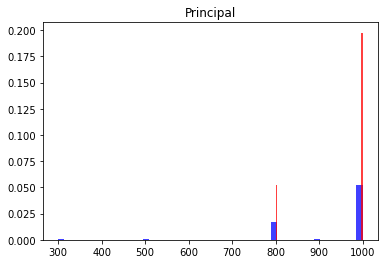

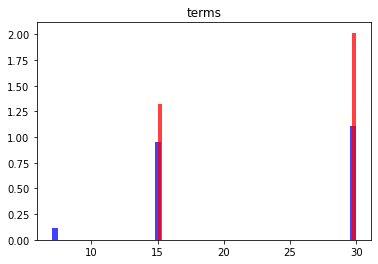

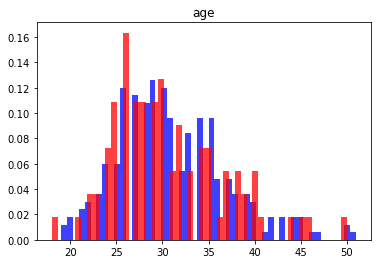

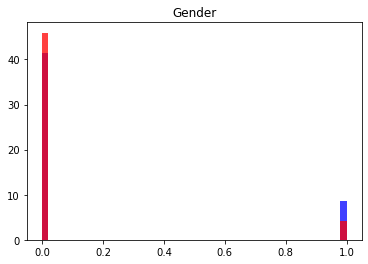

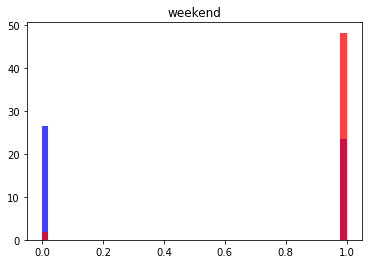

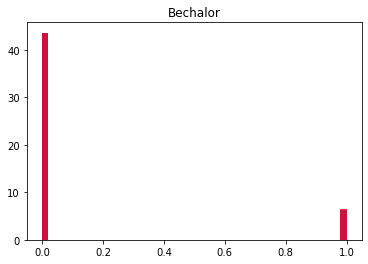

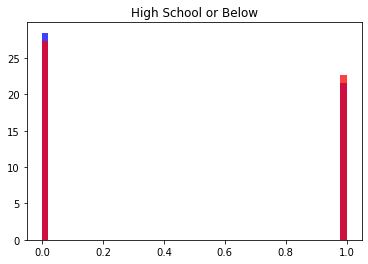

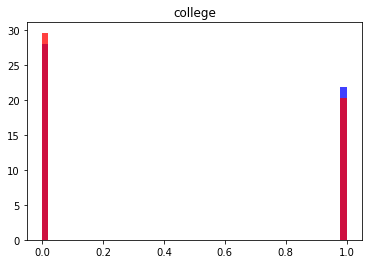

In [26]:
for x in range(0,len(np.asarray(X)[0])):
    
    plt.hist(np.asarray(X)[:,x][df['loan_status']=='PAIDOFF'], 50, density=True, facecolor='b', alpha=0.75,label='teset')
    plt.hist(np.asarray(X)[:,x][df['loan_status']=='COLLECTION'], 50, density=True, facecolor='r', alpha=0.75,label='teset2')
    plt.title(Feature.columns[x])
    plt.show()

In [27]:
y = df['loan_status'].values
y[-90:-80]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

In [28]:
ybin=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=False).values
ybin[-90:-80]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

### Normalize data

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

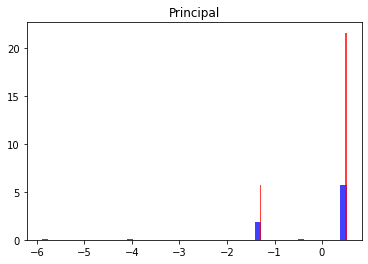

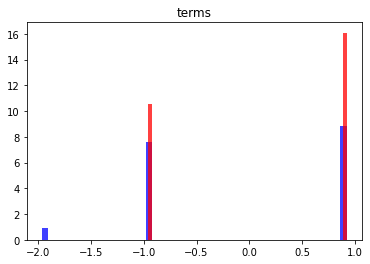

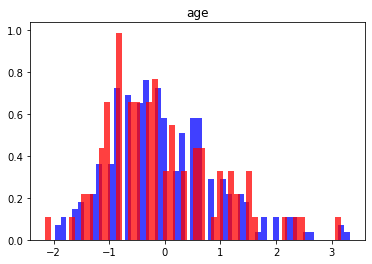

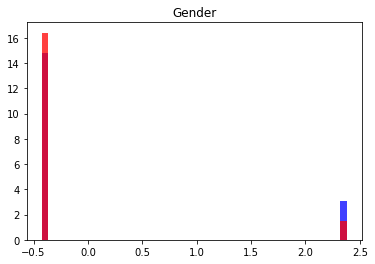

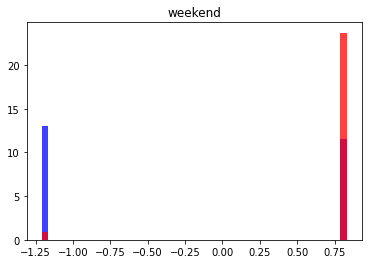

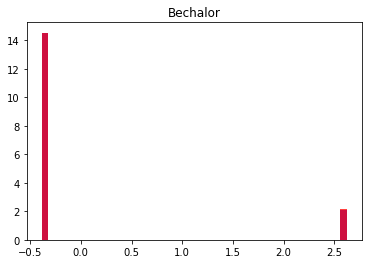

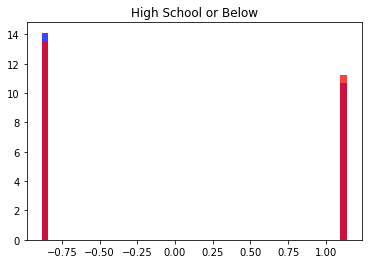

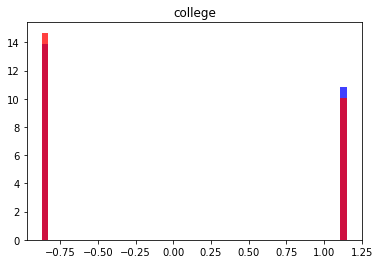

In [30]:
for x in range(0,len(X[0])):
    
    plt.hist(X[:,x][df['loan_status']=='PAIDOFF'], 50, density=True, facecolor='b', alpha=0.75,label='teset')
    plt.hist(X[:,x][df['loan_status']=='COLLECTION'], 50, density=True, facecolor='r', alpha=0.75,label='teset2')
    plt.title(Feature.columns[x])
    plt.show()

# Classification

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


## K Nearest Neighbour (KNN)

In [32]:
k=4

In [33]:
kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [34]:
yhat = kNN.predict(X_test)

In [35]:
print(yhat[0:5])
print(y_test[0:5])

[0 0 0 0 0]
[0 0 0 0 0]


## Metrics

In [36]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix


print("Train set Accuracy: ", metrics.accuracy_score(y_train, kNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


print('Jaccard score (PAIDOFF)= ', jaccard_score(y_test, yhat,pos_label=0))
print('Jaccard score (COLLECTION)= ', jaccard_score(y_test, yhat,pos_label=1))
print('Jaccard score (Micro)= ', jaccard_score(y_test, yhat,average='micro'))

yhat_prob = kNN.predict_proba(X_test)

print('Log Loss = ', log_loss(y_test, yhat_prob))

print('F1 score (PAIDOFF)= ', f1_score(y_test,yhat,pos_label=0))
print('F1 score (COLLECTION)= ', f1_score(y_test,yhat,pos_label=1))
print('F1 score (Micro)= ', f1_score(y_test, yhat,average='micro'))




cm = metrics.confusion_matrix(y_test, yhat) 
print(cm)
jaccard_score(y_test, yhat,average=None)

log_loss(y_test,yhat)

Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.7714285714285715
Jaccard score (PAIDOFF)=  0.7538461538461538
Jaccard score (COLLECTION)=  0.23809523809523808
Jaccard score (Micro)=  0.627906976744186
Log Loss =  2.3430002180702405
F1 score (PAIDOFF)=  0.8596491228070176
F1 score (COLLECTION)=  0.3846153846153846
F1 score (Micro)=  0.7714285714285715
[[49  6]
 [10  5]]


7.8946459986164585

In [37]:
def classifiermetircs(y_test,y_hat):
    jc = jaccard_score(y_test, yhat,average='micro')
    F1 = f1_score(y_test,yhat,average='micro')
    ll = log_loss(y_test,yhat)
    print('JC = {}\nF1 = {}\nLL = {}'.format(round(jc,3),round(F1,3),round(ll,3)))
    return [jc,F1,ll]
    

### Test dependance on k, training set size etc

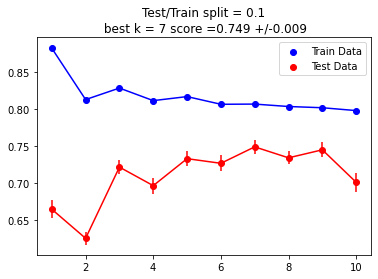

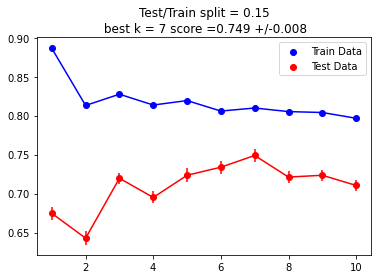

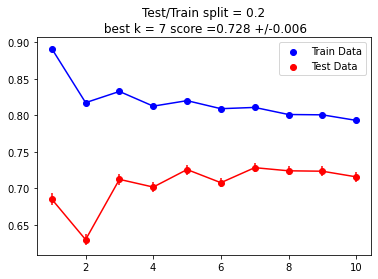

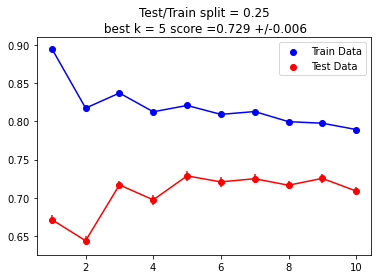

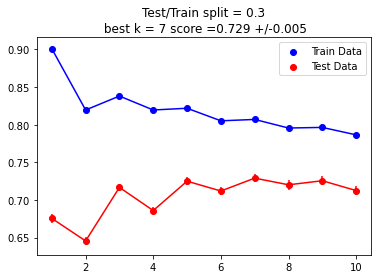

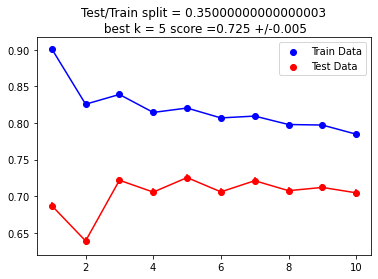

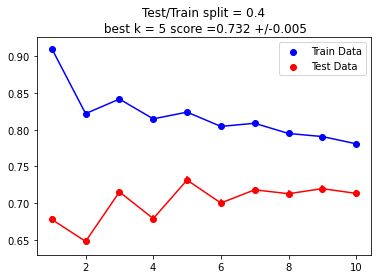

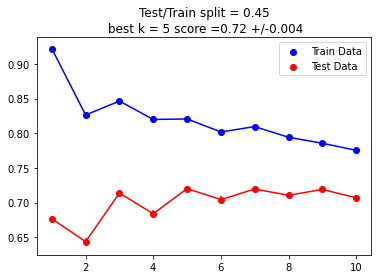

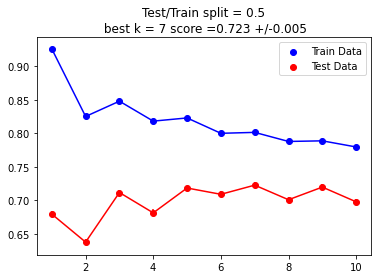

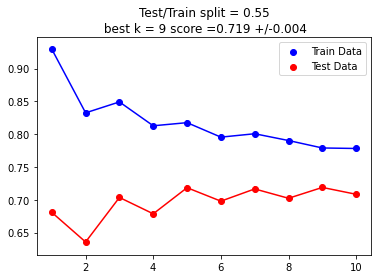

In [38]:
reps = 50
Ks=10
ts=0.2
bestscores=[]

for tsi in range (10,60,5):
    ts=tsi*0.01
    testacc=[]
    trainacc=[]
    for k in range(1,Ks+1):
        temptrain=[]
        temptest=[]
    
        for x in range(0,reps):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
            kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
            yhat = kNN.predict(X_test)
            trainaccuracy=metrics.accuracy_score(y_train, kNN.predict(X_train))
            testaccuracy=metrics.accuracy_score(y_test, yhat)
    
            #print('k = {}, test_size = {}, rep = {} of {}'.format(k,ts,x+1,reps))
            #print("Train set Accuracy: ", trainaccuracy)
            #print("Test set Accuracy: ", testaccuracy)
            temptrain.append(trainaccuracy)
            temptest.append(testaccuracy)
        trainacc.append([k,ts,np.mean(temptrain),np.std(temptrain, ddof=1) / np.sqrt(np.size(temptrain))])
        testacc.append([k,ts,np.mean(temptest),np.std(temptest, ddof=1) / np.sqrt(np.size(temptest))])

    
    trainacc=np.asarray(trainacc)
    testacc=np.asarray(testacc)
    maxi=np.argmax(testacc[:,-2])
  


    plt.title('Test/Train split = {}\n best k = {} score ={} +/-{}'.format(ts,int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)))
    plt.scatter(trainacc[:,0],trainacc[:,-2],c='b',label='Train Data')
    plt.errorbar(trainacc[:,0],trainacc[:,-2], yerr=trainacc[:,-1], c='b')
    plt.scatter(testacc[:,0],testacc[:,-2],c='r',label='Test Data')
    plt.errorbar(testacc[:,0],testacc[:,-2], yerr=testacc[:,-1],c='r')
    plt.legend()
    plt.show()
    
    bestscores.append([round(ts,3),int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)])
        

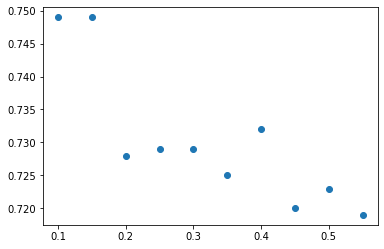

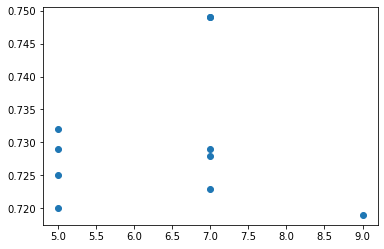

In [39]:
bestscores=np.asarray(bestscores)

plt.scatter(bestscores[:,0],bestscores[:,2])
plt.show()

plt.scatter(bestscores[:,1],bestscores[:,2])
plt.show()



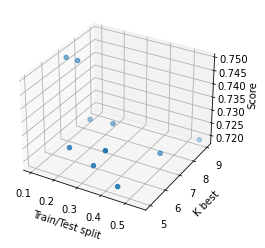

In [40]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bestscores[:,0], bestscores[:,1], bestscores[:,2], marker='o')

ax.set_ylabel('K best')
ax.set_xlabel('Train/Test split')
ax.set_zlabel('Score')

plt.show()

### Best values Knn

In [41]:
maxi=np.argmax(bestscores[:,-2])
maxi
ts, k = bestscores[maxi,0], int(bestscores[maxi,1])

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)


kNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = kNN.predict(X_test)

In [43]:
kNNresults=classifiermetircs(y_test,yhat)

JC = 0.75
F1 = 0.857
LL = 4.934


## Decision Tree

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)

In [45]:
dectree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dectree.fit(X_train,y_train)
yhat = dectree.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.6857142857142857

In [46]:
classifiermetircs(y_test,yhat)

JC = 0.522
F1 = 0.686
LL = 10.855


[0.5217391304347826, 0.6857142857142857, 10.855226774955973]

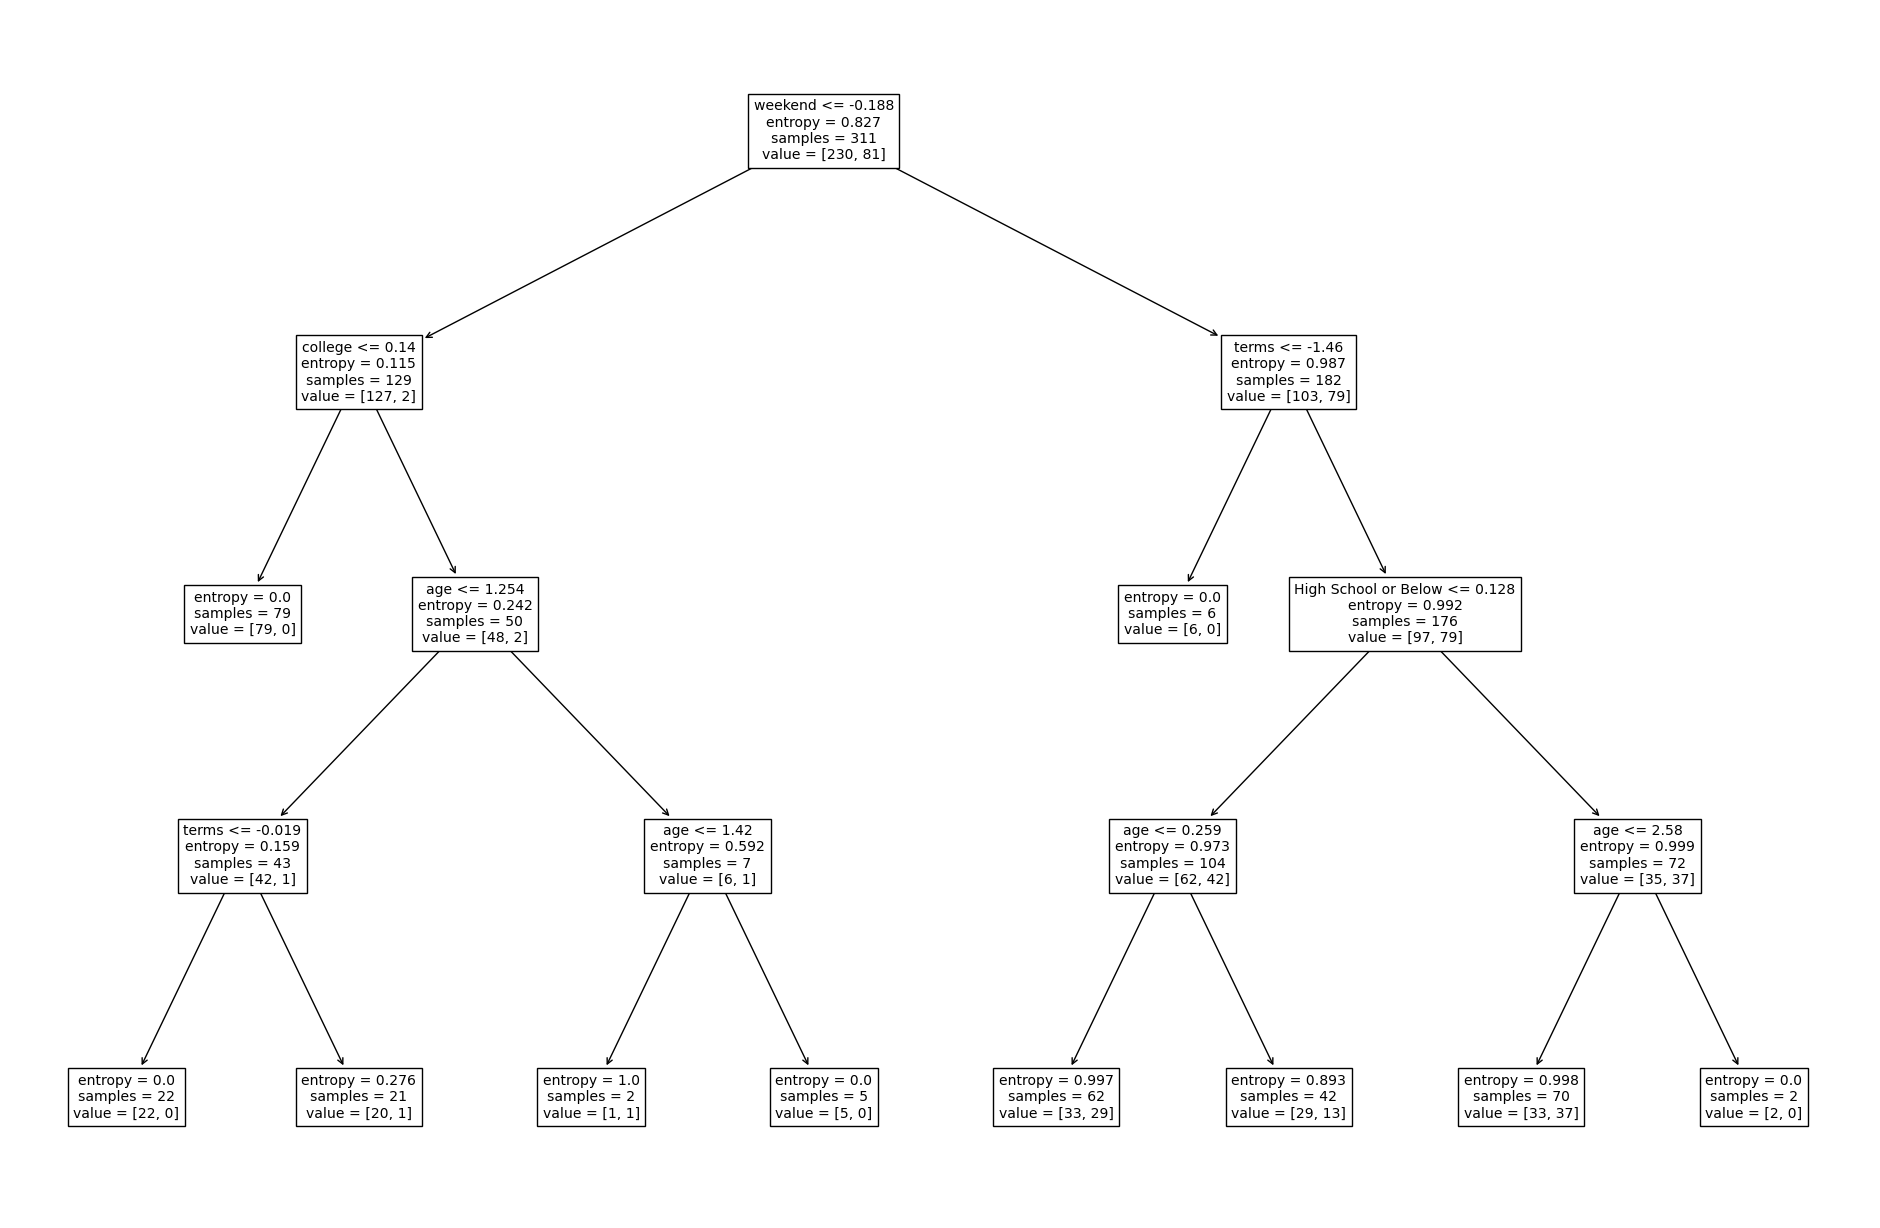

In [47]:
fig=plt.figure(figsize=(24,16), dpi= 100, facecolor='w', edgecolor='k')
tree.plot_tree(dectree,feature_names=list(Feature.columns))
plt.show()

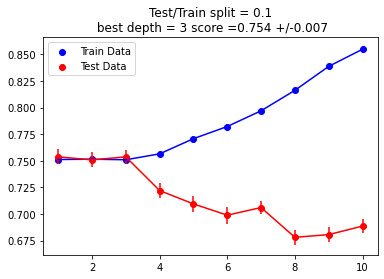

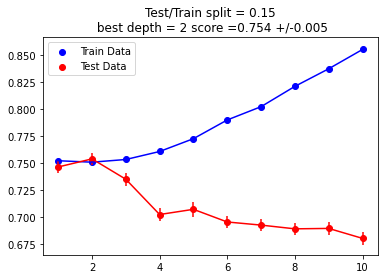

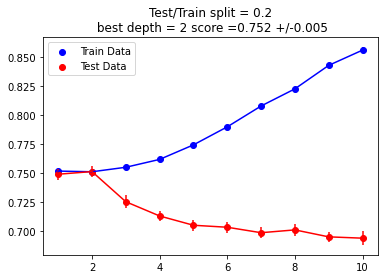

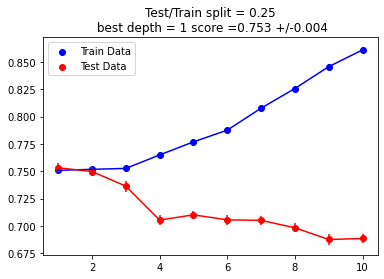

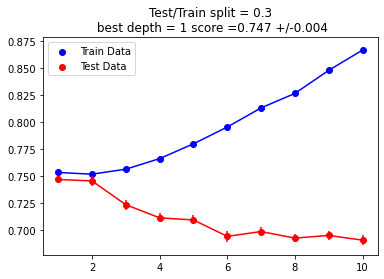

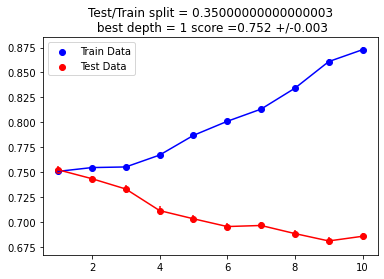

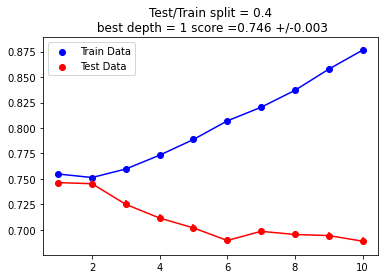

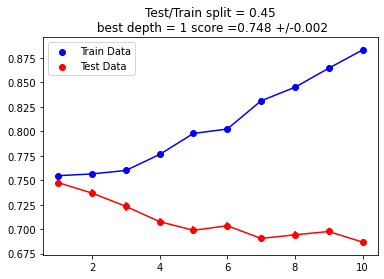

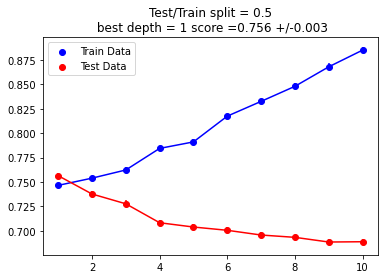

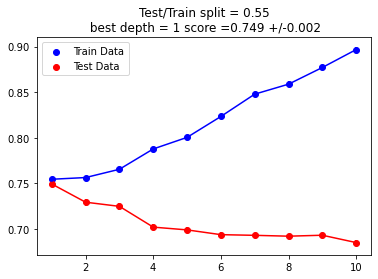

In [48]:
reps = 100
Ks=10
ts=0.2
bestscores=[]

for tsi in range (10,60,5):
    ts=tsi*0.01
    testacc=[]
    trainacc=[]
    for k in range(1,Ks+1):
        temptrain=[]
        temptest=[]
    
        for x in range(0,reps):
            X_train, X_test, y_train, y_test = train_test_split(X, ybin, test_size=ts)
            dectree = DecisionTreeClassifier(criterion="entropy", max_depth=k)
            dectree.fit(X_train,y_train)
            yhat = dectree.predict(X_test)
            
            trainaccuracy=metrics.accuracy_score(y_train, dectree.predict(X_train))
            testaccuracy=metrics.accuracy_score(y_test, yhat)
    
            #print('k = {}, test_size = {}, rep = {} of {}'.format(k,ts,x+1,reps))
            #print("Train set Accuracy: ", trainaccuracy)
            #print("Test set Accuracy: ", testaccuracy)
            temptrain.append(trainaccuracy)
            temptest.append(testaccuracy)
        trainacc.append([k,ts,np.mean(temptrain),np.std(temptrain, ddof=1) / np.sqrt(np.size(temptrain))])
        testacc.append([k,ts,np.mean(temptest),np.std(temptest, ddof=1) / np.sqrt(np.size(temptest))])

    
    trainacc=np.asarray(trainacc)
    testacc=np.asarray(testacc)
    maxi=np.argmax(testacc[:,-2])
  


    plt.title('Test/Train split = {}\n best depth = {} score ={} +/-{}'.format(ts,int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)))
    plt.scatter(trainacc[:,0],trainacc[:,-2],c='b',label='Train Data')
    plt.errorbar(trainacc[:,0],trainacc[:,-2], yerr=trainacc[:,-1], c='b')
    plt.scatter(testacc[:,0],testacc[:,-2],c='r',label='Test Data')
    plt.errorbar(testacc[:,0],testacc[:,-2], yerr=testacc[:,-1],c='r')
    plt.legend()
    plt.show()
    
    bestscores.append([round(ts,3),int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)])

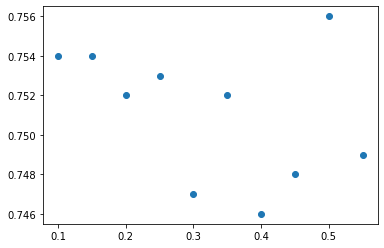

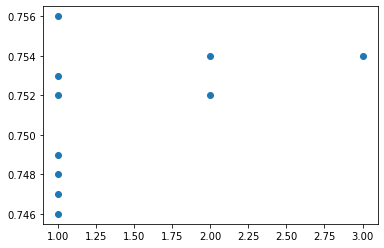

In [49]:
bestscores=np.asarray(bestscores)

plt.scatter(bestscores[:,0],bestscores[:,2])
plt.show()

plt.scatter(bestscores[:,1],bestscores[:,2])
plt.show()

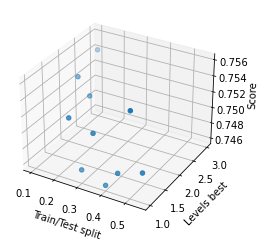

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bestscores[:,0], bestscores[:,1], bestscores[:,2], marker='o')

ax.set_ylabel('Levels best')
ax.set_xlabel('Train/Test split')
ax.set_zlabel('Score')

plt.show()

### Best decision tree

In [51]:
maxi=np.argmax(bestscores[:,-2])
maxi
ts, k = bestscores[maxi,0], int(bestscores[maxi,1])
print(ts, k)

0.5 1


In [52]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)

In [53]:
dectree = DecisionTreeClassifier(criterion="entropy", max_depth=k)
dectree.fit(X_train,y_train)
yhat = dectree.predict(X_test)
dectreeresults=classifiermetircs(y_test,yhat)

JC = 0.58
F1 = 0.734
LL = 9.184


## Support Vector Machine

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)

In [55]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat = clf.predict(X_test)
classifiermetircs(y_test,yhat)

JC = 0.587
F1 = 0.74
LL = 8.984


[0.5871559633027523, 0.7398843930635838, 8.984079406753821]

In [56]:
for kernals in ['rbf','linear','poly','sigmoid']:
    clf = svm.SVC(kernel=kernals)
    clf.fit(X_train, y_train) 

    yhat = clf.predict(X_test)
    print(kernals)
    classifiermetircs(y_test,yhat)

rbf
JC = 0.587
F1 = 0.74
LL = 8.984
linear
JC = 0.58
F1 = 0.734
LL = 9.184
poly
JC = 0.552
F1 = 0.711
LL = 9.982
sigmoid
JC = 0.531
F1 = 0.694
LL = 10.581


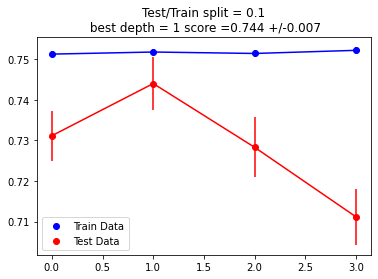

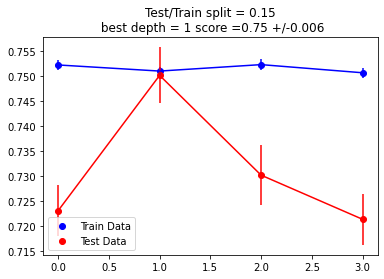

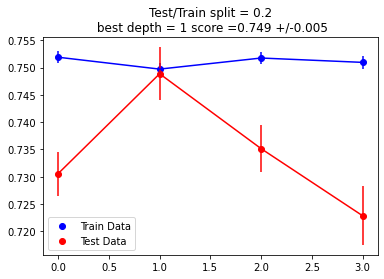

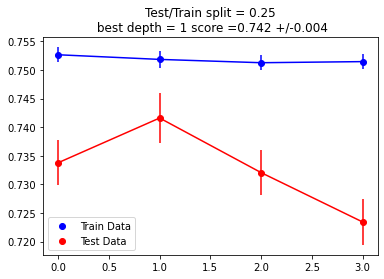

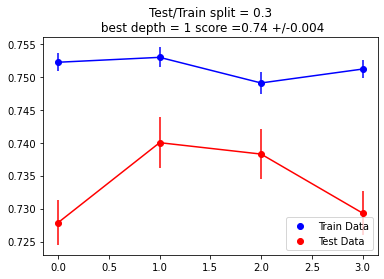

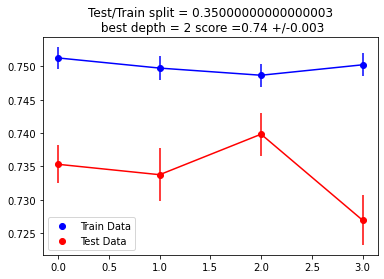

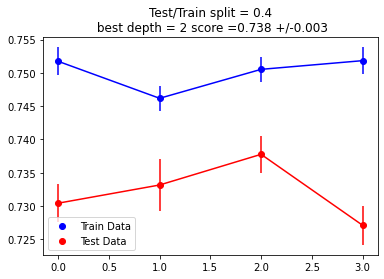

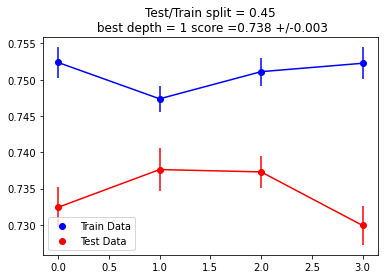

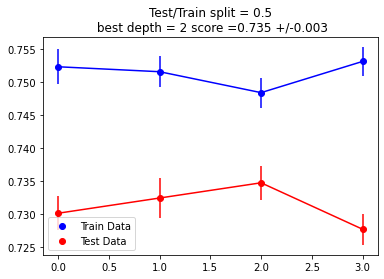

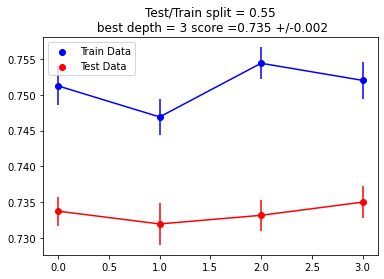

In [57]:
reps = 100
ts=0.2
bestscores=[]
kernals=['rbf','linear','poly','sigmoid']

for tsi in range (10,60,5):
    ts=tsi*0.01
    testacc=[]
    trainacc=[]
    for k in range(0,len(kernals)):
        temptrain=[]
        temptest=[]
    
        for x in range(0,reps):
            X_train, X_test, y_train, y_test = train_test_split(X, ybin, test_size=ts)
            clf = svm.SVC(kernel=kernals[k])
            clf.fit(X_train, y_train)
            yhat = clf.predict(X_test)
            
            trainaccuracy=metrics.accuracy_score(y_train, dectree.predict(X_train))
            testaccuracy=metrics.accuracy_score(y_test, yhat)
    
            #print('k = {}, test_size = {}, rep = {} of {}'.format(k,ts,x+1,reps))
            #print("Train set Accuracy: ", trainaccuracy)
            #print("Test set Accuracy: ", testaccuracy)
            temptrain.append(trainaccuracy)
            temptest.append(testaccuracy)
        trainacc.append([k,ts,np.mean(temptrain),np.std(temptrain, ddof=1) / np.sqrt(np.size(temptrain))])
        testacc.append([k,ts,np.mean(temptest),np.std(temptest, ddof=1) / np.sqrt(np.size(temptest))])

    
    trainacc=np.asarray(trainacc)
    testacc=np.asarray(testacc)
    maxi=np.argmax(testacc[:,-2])
  


    plt.title('Test/Train split = {}\n best depth = {} score ={} +/-{}'.format(ts,int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)))
    plt.scatter(trainacc[:,0],trainacc[:,-2],c='b',label='Train Data')
    plt.errorbar(trainacc[:,0],trainacc[:,-2], yerr=trainacc[:,-1], c='b')
    plt.scatter(testacc[:,0],testacc[:,-2],c='r',label='Test Data')
    plt.errorbar(testacc[:,0],testacc[:,-2], yerr=testacc[:,-1],c='r')
    plt.legend()
    plt.show()
    
    bestscores.append([round(ts,3),int(testacc[maxi,0]),round(testacc[maxi,2],3),round(testacc[maxi,3],3)])

[[0.1, 1, 0.744, 0.007], [0.15, 1, 0.75, 0.006], [0.2, 1, 0.749, 0.005], [0.25, 1, 0.742, 0.004], [0.3, 1, 0.74, 0.004], [0.35, 2, 0.74, 0.003], [0.4, 2, 0.738, 0.003], [0.45, 1, 0.738, 0.003], [0.5, 2, 0.735, 0.003], [0.55, 3, 0.735, 0.002]]


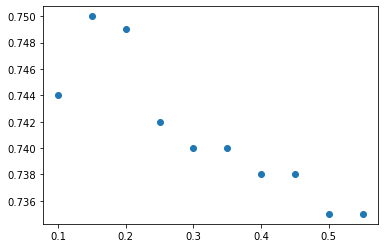

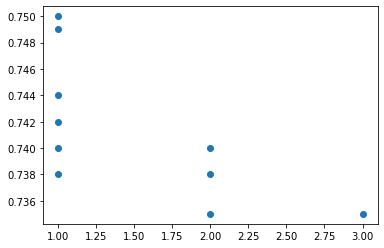

In [58]:
print(bestscores)
bestscores=np.asarray(bestscores)

plt.scatter(bestscores[:,0],bestscores[:,2])
plt.show()

plt.scatter(bestscores[:,1],bestscores[:,2])
plt.show()

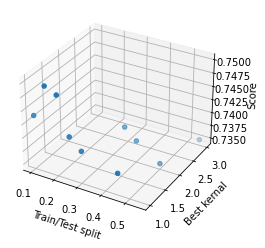

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bestscores[:,0], bestscores[:,1], bestscores[:,2], marker='o')

ax.set_ylabel('Best kernal')
ax.set_xlabel('Train/Test split')
ax.set_zlabel('Score')

plt.show()

### Best SVM

In [60]:
maxi=np.argmax(bestscores[:,-2])
maxi
ts, k = bestscores[maxi,0], kernals[int(bestscores[maxi,1])]
print(ts, k)

0.15 linear


In [61]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)

In [62]:
clf = svm.SVC(kernel=k)
clf.fit(X_train, y_train) 

yhat = clf.predict(X_test)
svmresults=classifiermetircs(y_test,yhat)

JC = 0.677
F1 = 0.808
LL = 6.642


## Logistic Regression

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)
yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)

classifiermetircs(y_test,yhat)

JC = 0.552
F1 = 0.712
LL = 9.963


[0.5522388059701493, 0.7115384615384616, 9.963216213570607]

In [64]:
for solv in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)
    LR = LogisticRegression(C=0.01, solver = solv).fit(X_train, y_train)
    yhat = LR.predict(X_test)

    yhat_prob = LR.predict_proba(X_test)
    print(solv)
    classifiermetircs(y_test,yhat)

newton-cg
JC = 0.677
F1 = 0.808
LL = 6.642
lbfgs
JC = 0.677
F1 = 0.808
LL = 6.642
liblinear
JC = 0.552
F1 = 0.712
LL = 9.963
sag
JC = 0.677
F1 = 0.808
LL = 6.642
saga
JC = 0.677
F1 = 0.808
LL = 6.642


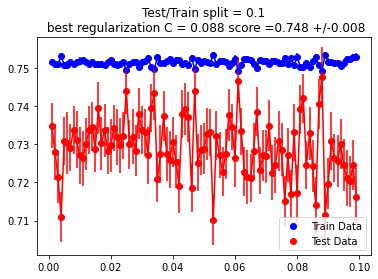

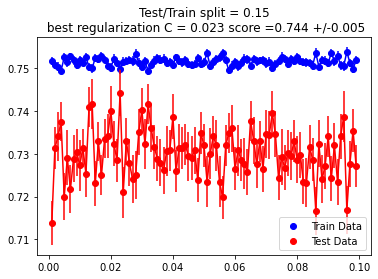

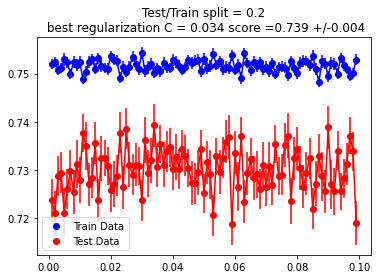

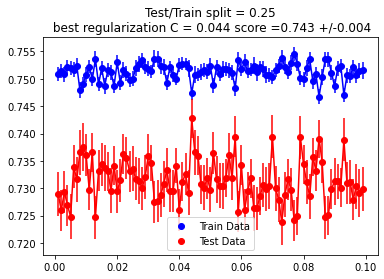

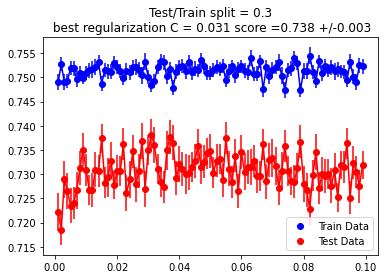

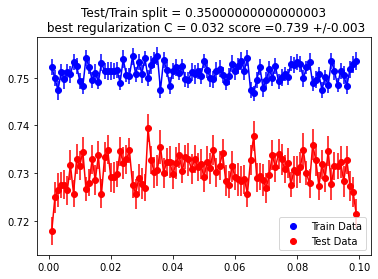

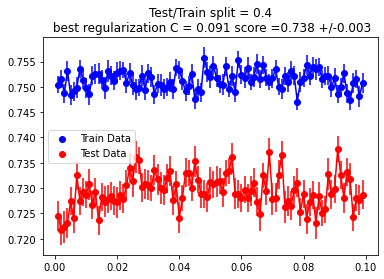

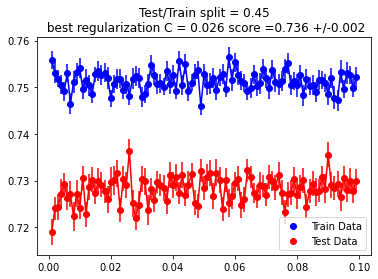

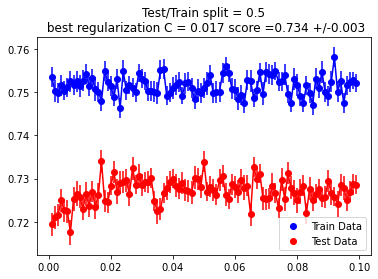

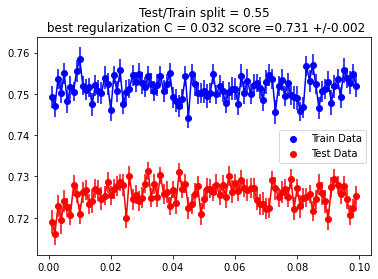

In [65]:
reps = 100
ts=0.2
bestscores=[]
Cs=10

for tsi in range (10,60,5):
    ts=tsi*0.01
    testacc=[]
    trainacc=[]
    for Cvali in range(1,50):
        Cval=Cvali/100
        temptrain=[]
        temptest=[]
    
        for x in range(0,reps):
            X_train, X_test, y_train, y_test = train_test_split(X, ybin, test_size=ts)
            LR = LogisticRegression(C=Cval, solver = 'liblinear').fit(X_train, y_train)
            yhat = LR.predict(X_test)
            
            trainaccuracy=metrics.accuracy_score(y_train, dectree.predict(X_train))
            testaccuracy=metrics.accuracy_score(y_test, yhat)
    
            #print('k = {}, test_size = {}, rep = {} of {}'.format(k,ts,x+1,reps))
            #print("Train set Accuracy: ", trainaccuracy)
            #print("Test set Accuracy: ", testaccuracy)
            temptrain.append(trainaccuracy)
            temptest.append(testaccuracy)
        trainacc.append([Cval,ts,np.mean(temptrain),np.std(temptrain, ddof=1) / np.sqrt(np.size(temptrain))])
        testacc.append([Cval,ts,np.mean(temptest),np.std(temptest, ddof=1) / np.sqrt(np.size(temptest))])

    
    trainacc=np.asarray(trainacc)
    testacc=np.asarray(testacc)
    maxi=np.argmax(testacc[:,-2])
  


    plt.title('Test/Train split = {}\n best regularization C = {} score ={} +/-{}'.format(ts,testacc[maxi,0],round(testacc[maxi,2],3),round(testacc[maxi,3],3)))
    plt.scatter(trainacc[:,0],trainacc[:,-2],c='b',label='Train Data')
    plt.errorbar(trainacc[:,0],trainacc[:,-2], yerr=trainacc[:,-1], c='b')
    plt.scatter(testacc[:,0],testacc[:,-2],c='r',label='Test Data')
    plt.errorbar(testacc[:,0],testacc[:,-2], yerr=testacc[:,-1],c='r')
    plt.legend()
    plt.show()
    
    bestscores.append([round(ts,3),testacc[maxi,0],testacc[maxi,2],testacc[maxi,3]])

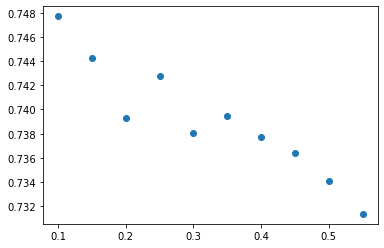

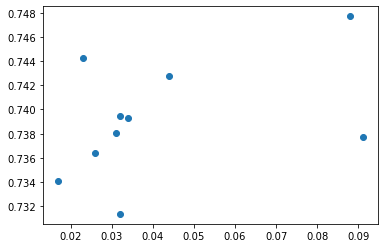

In [66]:

bestscores=np.asarray(bestscores)

plt.scatter(bestscores[:,0],bestscores[:,2])
plt.show()

plt.scatter(bestscores[:,1],bestscores[:,2])
plt.show()

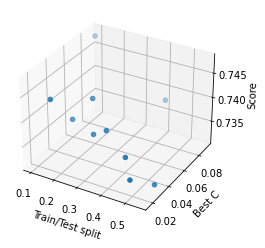

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bestscores[:,0], bestscores[:,1], bestscores[:,2], marker='o')

ax.set_ylabel('Best C')
ax.set_xlabel('Train/Test split')
ax.set_zlabel('Score')

plt.show()

### Best logistics regression

In [68]:
bestscores

array([[0.1       , 0.088     , 0.74771429, 0.0076843 ],
       [0.15      , 0.023     , 0.74423077, 0.00542209],
       [0.2       , 0.034     , 0.73928571, 0.00441776],
       [0.25      , 0.044     , 0.74275862, 0.0035221 ],
       [0.3       , 0.031     , 0.73807692, 0.00328035],
       [0.35      , 0.032     , 0.73942623, 0.00298233],
       [0.4       , 0.091     , 0.73769784, 0.00258973],
       [0.45      , 0.026     , 0.73641026, 0.00247897],
       [0.5       , 0.017     , 0.73404624, 0.00266159],
       [0.55      , 0.032     , 0.73136126, 0.00224323]])

In [69]:
maxi=np.argmax(bestscores[:,-2])
maxi
ts, k = bestscores[maxi,0], bestscores[maxi,1]
print(ts, k)


0.1 0.088


In [70]:
X_train, X_test, y_train, y_test = train_test_split( X, ybin, test_size=ts, random_state=4)
LR = LogisticRegression(C=k, solver = 'liblinear').fit(X_train, y_train)
yhat = LR.predict(X_test)

yhat_prob = LR.predict_proba(X_test)

LRresults=classifiermetircs(y_test,yhat)

JC = 0.667
F1 = 0.8
LL = 6.908


# Compare All Approaches



In [77]:
resultsall=[kNNresults[0:-1]+['N/A'],dectreeresults[0:-1]+['N/A'],svmresults[0:-1]+['N/A'],LRresults]
df=pd.DataFrame(resultsall,columns=['Jacquard Score', 'F1 score', 'LogLoss'])
df.insert(0,"Algorithm",['KNN','Decision Tree','SVM','Logistic Regression'])

In [78]:
df

,Algorithm,Jacquard Score,F1 score,LogLoss
0,KNN,0.750000,0.857143,N/A
1,Decision Tree,0.579909,0.734104,N/A
2,SVM,0.677419,0.807692,N/A
3,Logistic Regression,0.666667,0.800000,6.907847
